# This is Tree based Alogithm that finds the nearest Alloy Combination for the given Properties

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

In [5]:
data=pd.read_csv('Alloy_Yield_Strength.csv')

Simple Exploratory Data Analysis

In [8]:
data.head(10)

,ID,Alloy,Diff. Lattice Constants,Diff. Melting Point,Mixing Enthalpy,Lattice Constants,Lambda,Diff. in atomic radii,Omega,Melting Temp.,Diff. Electronegativity Allen,Diff. Electronegativity Pauling,Diff. Shear modulus,Avg shear modulus,Mixing Entropy,Valence electron,YS (MPa)
0,1,CoFeNiSi0.75,1.055488,44.663044,-20.891718,3.458903,12365.521870,0.030454,962.065244,1752.617690,0.042160,0.031383,0.108400,75.734130,11.468101,8.00009,1301.0
1,2,Al0.75CoFeNi,0.583340,340.165333,-18.403367,3.182623,3378.840617,0.058259,998.234959,1601.911690,0.096577,0.110862,0.334610,68.974130,11.468101,7.80009,794.0
2,3,AlCoCrFeNi,0.547353,408.517377,-18.936480,3.171420,4008.389723,0.057779,1190.078167,1684.094000,0.105878,0.120565,0.375623,76.100000,13.381611,7.20000,1251.0
3,4,AlC0.1CoCrFeNi,0.555328,614.520156,-22.166188,3.157579,1146.418173,0.110198,1084.069454,1726.054788,0.200370,0.204580,0.512706,74.837877,13.921741,7.13732,957.0
4,5,AlC0.2CoCrFeNi,0.557151,652.282081,-25.134585,3.144244,1004.453102,0.118993,999.503387,1766.373166,0.216354,0.219744,0.515326,73.623937,14.222421,7.07700,906.0
5,6,AlC0.3CoCrFeNi,0.558736,687.273919,-27.865034,3.131380,895.405625,0.126959,934.979270,1805.156080,0.230950,0.233624,0.518211,72.454960,14.432674,7.01888,867.0
6,7,AlC0.4CoCrFeNi,0.560118,719.915035,-30.379556,3.119085,809.259469,0.134253,884.653201,1842.556449,0.244411,0.246445,0.521318,71.331414,14.585915,6.96312,1056.0
7,8,AlC0.5CoCrFeNi,0.561302,750.512351,-32.693745,3.107140,739.463026,0.140985,844.539288,1878.558785,0.256916,0.258369,0.524589,70.246157,14.698051,6.90916,1060.0
8,9,AlCCoCrFeNi,0.564956,880.052799,-41.793894,3.053578,524.318372,0.168563,727.389206,2040.619145,0.308957,0.308043,0.542381,65.367974,14.897649,6.66680,1251.0
9,10,AlC1.5CoCrFeNi,0.565914,982.064694,-47.814000,3.008232,411.974609,0.189443,673.402421,2177.723020,0.349225,0.346476,0.560702,61.239934,14.785197,6.46168,1255.0


In [9]:
data.columns

Index(['ID', 'Alloy', 'Diff. Lattice Constants', 'Diff. Melting Point',
       'Mixing Enthalpy', 'Lattice Constants', 'Lambda',
       'Diff. in atomic radii', 'Omega', 'Melting Temp.',
       'Diff. Electronegativity Allen', 'Diff. Electronegativity Pauling',
       'Diff. Shear modulus', 'Avg shear modulus', 'Mixing Entropy',
       'Valence electron', 'YS (MPa)'],
      dtype='object')

In [29]:
data_new=data.drop(['ID','Diff. Lattice Constants','Diff. in atomic radii','Diff. Electronegativity Pauling','Valence electron','Omega','Diff. Electronegativity Allen','Lambda','Lattice Constants'],axis=1)

In [30]:
data_new.head(10)

,Alloy,Diff. Melting Point,Mixing Enthalpy,Melting Temp.,Diff. Shear modulus,Avg shear modulus,Mixing Entropy,YS (MPa)
0,CoFeNiSi0.75,44.663044,-20.891718,1752.617690,0.108400,75.734130,11.468101,1301.0
1,Al0.75CoFeNi,340.165333,-18.403367,1601.911690,0.334610,68.974130,11.468101,794.0
2,AlCoCrFeNi,408.517377,-18.936480,1684.094000,0.375623,76.100000,13.381611,1251.0
3,AlC0.1CoCrFeNi,614.520156,-22.166188,1726.054788,0.512706,74.837877,13.921741,957.0
4,AlC0.2CoCrFeNi,652.282081,-25.134585,1766.373166,0.515326,73.623937,14.222421,906.0
5,AlC0.3CoCrFeNi,687.273919,-27.865034,1805.156080,0.518211,72.454960,14.432674,867.0
6,AlC0.4CoCrFeNi,719.915035,-30.379556,1842.556449,0.521318,71.331414,14.585915,1056.0
7,AlC0.5CoCrFeNi,750.512351,-32.693745,1878.558785,0.524589,70.246157,14.698051,1060.0
8,AlCCoCrFeNi,880.052799,-41.793894,2040.619145,0.542381,65.367974,14.897649,1251.0
9,AlC1.5CoCrFeNi,982.064694,-47.814000,2177.723020,0.560702,61.239934,14.785197,1255.0


In [31]:
data_correlation_analysis=data_new.drop(['Alloy'],axis=1)

In [32]:
correlation_matrix=data_correlation_analysis.corr()

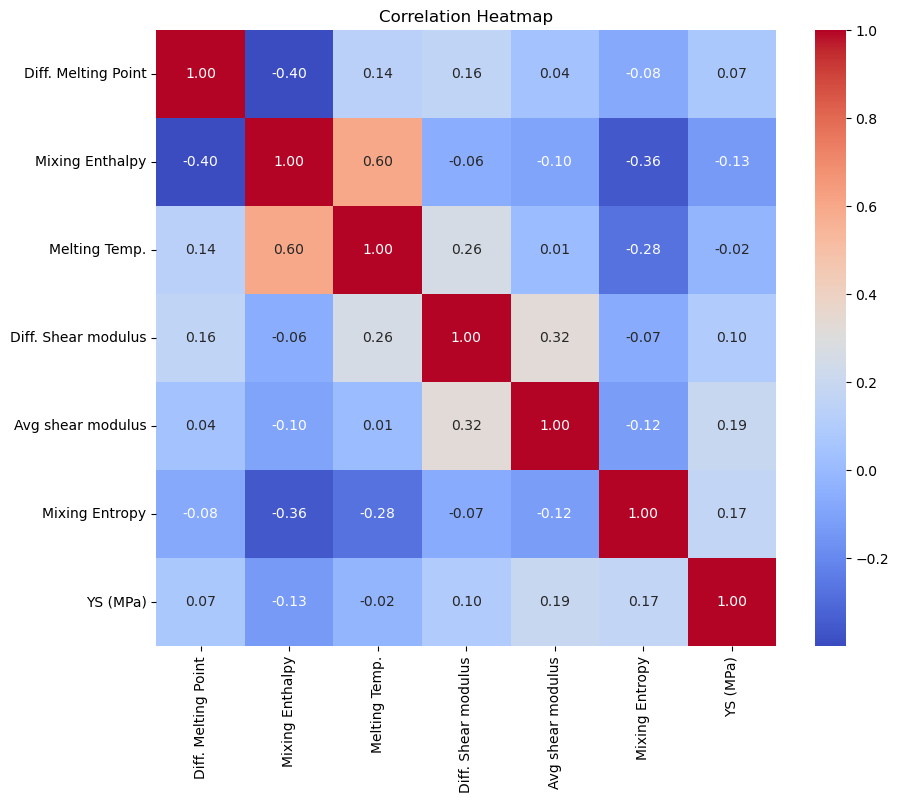

In [33]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [34]:
# Filter variables with correlation greater than 50%
threshold = 0.5  # Set your threshold here
high_correlation_vars = correlation_matrix[abs(correlation_matrix) > threshold]
high_correlation_vars = high_correlation_vars[high_correlation_vars != 1].dropna(how='all')
# Print variables with correlation > 50%
print("Variables with correlation > 50%:")
print(high_correlation_vars)

Variables with correlation > 50%:
                 Diff. Melting Point  Mixing Enthalpy  Melting Temp.  \
Mixing Enthalpy                  NaN              NaN       0.600329   
Melting Temp.                    NaN         0.600329            NaN   

                 Diff. Shear modulus  Avg shear modulus  Mixing Entropy  \
Mixing Enthalpy                  NaN                NaN             NaN   
Melting Temp.                    NaN                NaN             NaN   

                 YS (MPa)  
Mixing Enthalpy       NaN  
Melting Temp.         NaN  


# Training And Testing

In [53]:
label_encoder = LabelEncoder()


X = data_new.drop(['Alloy'],axis=1)
y = label_encoder.fit_transform(data_new['Alloy'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Extra Trees Regressor
extra_trees = ExtraTreesRegressor(n_estimators=100, random_state=42)

# Train the regressor
extra_trees.fit(X_train, y_train)

# Make predictions on the test set
predictions = extra_trees.predict(X_test)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 220.44754687499994


# Lets Make a New Prediction

In [52]:
# Enter in the reguired inputs to find the requred alloy in the correct order as trained

Diff_Melting_Point=1000
Mixing_Enthalpy=-60
Melting_Temp=2600
Diff_Shear_modulus=0.56
Avg_shear_modulus=78.90
Mixing_Entropy=13.87
YS_MPa=976

prediction_data=np.array([[Diff_Melting_Point,Mixing_Enthalpy,Melting_Temp,Diff_Shear_modulus,Avg_shear_modulus,Mixing_Entropy,YS_MPa]])

In [51]:
new_presdiction = extra_trees.predict(prediction_data)
new_presdiction=np.round(new_presdiction).astype(int)
decoded_labels = label_encoder.inverse_transform(new_presdiction)
print(f"The Correct Alloy Combination is {decoded_labels}")

The Correct Alloy Combination is ['Hf0.4Nb1.54Ta1.54Ti0.89Zr0.64']


C:\Users\bismark\Anaconda3 2\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
